In [1]:
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('BankChurners.csv', encoding='windows-1252')

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
# размер набора данных
data.shape

(10127, 23)

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

In [6]:
# Дублирующиеся значения
data.duplicated().sum()

0

In [7]:
data.dtypes

In [8]:
# Статистические характеристки датасета
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [9]:
le = LabelEncoder()
le.fit(data['Attrition_Flag'])
data['Attrition_Flag_new']=le.transform(data['Attrition_Flag'])

In [10]:
le.fit(data['Gender'])
data['Gender_new']=le.transform(data['Gender'])

In [11]:
le.fit(data['Education_Level'])
data['Education_Level_new']=le.transform(data['Education_Level'])

In [12]:
le.fit(data['Marital_Status'])
data['Marital_Status_new']=le.transform(data['Marital_Status'])

In [13]:
le.fit(data['Income_Category'])
data['Income_Category_new']=le.transform(data['Income_Category'])

In [14]:
le.fit(data['Card_Category'])
data['Card_Category_new']=le.transform(data['Card_Category'])

In [15]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Attrition_Flag_new,Gender_new,Education_Level_new,Marital_Status_new,Income_Category_new,Card_Category_new
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,0.000093,0.99991,1,1,3,1,2,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,0.000057,0.99994,1,0,2,2,4,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,0.000021,0.99998,1,1,2,1,3,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,0.000134,0.99987,1,0,3,3,4,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,0.000022,0.99998,1,1,5,1,2,0


In [16]:
columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category']
data_new=data.drop(columns, inplace=True, axis=1) 

In [17]:
data.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Attrition_Flag_new,Gender_new,Education_Level_new,Marital_Status_new,Income_Category_new,Card_Category_new
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1.625,0.061,0.000093,0.99991,1,1,3,1,2,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,3.714,0.105,0.000057,0.99994,1,0,2,2,4,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,2.333,0.000,0.000021,0.99998,1,1,2,1,3,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,2.333,0.760,0.000134,0.99987,1,0,3,3,4,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,2.500,0.000,0.000022,0.99998,1,1,5,1,2,0


In [18]:
columns = ['Months_on_book', 'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal']
data_new=data.drop(columns, inplace=True, axis=1) 

In [19]:
columns = [ 'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
data_new=data.drop(columns, inplace=True, axis=1) 

In [20]:
data.head(10)
#'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'

,CLIENTNUM,Customer_Age,Dependent_count,Total_Relationship_Count,Contacts_Count_12_mon,Attrition_Flag_new,Gender_new,Education_Level_new,Marital_Status_new,Income_Category_new,Card_Category_new
0,768805383,45,3,5,3,1,1,3,1,2,0
1,818770008,49,5,6,2,1,0,2,2,4,0
2,713982108,51,3,4,0,1,1,2,1,3,0
3,769911858,40,4,3,1,1,0,3,3,4,0
4,709106358,40,3,5,0,1,1,5,1,2,0
5,713061558,44,2,3,2,1,1,2,1,1,0
6,810347208,51,4,6,3,1,1,6,1,0,1
7,818906208,32,0,2,2,1,1,3,3,2,3
8,710930508,37,3,5,0,1,1,5,2,2,0
9,719661558,48,2,6,3,1,1,2,2,3,0


In [21]:
columns = ['Dependent_count', 'Total_Relationship_Count', 'Contacts_Count_12_mon']
data_new=data.drop(columns, inplace=True, axis=1) 

In [22]:
data_new = data
X=data_new
y=data_new['Gender_new'] 

In [23]:
data_new_X_train, data_new_X_test, data_new_y_train, data_new_y_test = train_test_split(X,y, test_size=0.15, random_state=1)

In [24]:
# Размер обучающей выборки
data_new_X_train.shape, data_new_y_train.shape

((8607, 8), (8607,))

In [25]:
# Размер тестовой выборки
data_new_X_test.shape, data_new_y_test.shape

((1520, 8), (1520,))

In [26]:
data_new_y_test.head()

In [27]:
from enum import Enum
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

In [28]:
class SimpleKNN:
    
    def fit(self, X_train: np.matrix, y_train: np.ndarray):
        """
        Метод обучения, который фактически не учится, 
        а только запоминает обучающую выборку.
        Входные параметры:
        X_train - обучающая выборка (матрица объект-признак)
        y_train - обучающая выборка (вектор целевого признака)
        Возвращаемое значение: нет
        """
        #Сохраняем параметры в переменных класса
        self._X_train = X_train
        self._y_train = y_train
          
    def eucl_dist(self, p: np.ndarray, q: np.ndarray) -> float:
        """
        Вычисление Евклидова расстояния - https://en.wikipedia.org/wiki/Euclidean_distance 
        Входные параметры:
        p, q - вектора в n-мерном пространстве признаков
        """
        return math.sqrt(sum([(pi - qi) ** 2 for pi, qi in zip (p, q)]))
            
            
    def predict_for_single_object(self, K: int, \
                prediction_type: PredictionType, \
                X_o: np.ndarray, \
                verbose = True) -> np.ndarray:
        """
        Метод предсказания для одного объекта.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_o - строка матрицы объект-признак, соответствующая объекту
        verbose - флаг детального вывода
        Возвращаемое значение: предсказанное значение целевого признака
        """
        # список соседей
        neighbors_list = []
        # *** Находим ближайшие точки ***
        # Перебираем все точки обучающей выборки
        for i in range(self._X_train.shape[0]):
            # получаем текущую точку
            data_train_current_x = [x for x in self._X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']].iloc[i]]
            # и значение ее y
            data_train_current_y = self._y_train.values[i]
            # вычисляем расстояние
            dist = self.eucl_dist(X_o, data_train_current_x)
            # сохраняем в список соседей
            temp_res = (data_train_current_y, dist, data_train_current_x)
            neighbors_list.append(temp_res)
        # *** сортируем список соседей по возрастанию расстояния *** 
        # в кортеже элементы следуют в порядке (0,1,2), сортируем по первому элементу 
        neighbors_list_sorted = sorted(neighbors_list, key=itemgetter(1))
        if verbose:
            print()
            print('**************************************')
            print('Проверяемая точка: ', X_o)
            print('**************************************')
            print('Вывод отсортированного списка соседей:')    
            dist_list = []
            for cur_y, cur_dist, temp_x_1_2 in neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
                dist_list.append(cur_dist)
            print()
            print('Вывод расстояния для отсортированного списка соседей:')    
            plt.plot(dist_list)
            plt.show()
        # Оставим только K ближайших соседей
        K_neighbors_list_sorted = neighbors_list_sorted[:K]
        if verbose:
            print('Вывод К ближайших соседей:')
            x1_list = []
            x2_list = []
            for cur_y, cur_dist, temp_x_1_2 in K_neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                x1_list.append(temp_x1)
                x2_list.append(temp_x2)
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
            print()
            print('Визуализация К ближайших соседей:')
            plt.plot(self._X_train['x1'], self._X_train['x2'], 'b.', \
                     x1_list, x2_list,  'g*', \
                    [X_o[0]], [X_o[1]], 'ro')
            plt.show()   
        # Результат - классификация или регрессия
        if prediction_type == PredictionType.REGRESSION:
            # используем numpy для вычисления среднего значения
            arr = np.array([x for x,_,_ in K_neighbors_list_sorted])
            # возвращаем среднее значение
            return np.mean(arr)          
        elif prediction_type == PredictionType.CLASSIFICATION:
            k_y_list = [y for y,_,_ in K_neighbors_list_sorted]
            # группируем с количеством метки классов,
            # соответствующие K ближайшим соседям
            k_y_list_grouped_temp = np.unique(k_y_list, return_counts=True)
            k_y_list_grouped = [[key, cnt] for key, cnt in zip(k_y_list_grouped_temp[0], k_y_list_grouped_temp[1])]
            # сортируем по количеству по убыванию
            k_y_list_grouped_sorted = sorted(k_y_list_grouped, key=itemgetter(1), reverse=True)
            if verbose:
                print('Классы, соответствующие К ближайшим соседям:')
                for i in k_y_list_grouped_sorted:
                    print('класс={0}, количество элементов={1}'.format(i[0], i[1]))
            # возвращаеv метку класса из первой строки отсортированного массива
            # то есть того класса, к которому принадлежит наибольшее количество соседей
            return k_y_list_grouped_sorted[0][0]
        else:
            raise Exception('Неизвестный тип предсказания')
                   
    
    def predict(self, K: int, \
                prediction_type: PredictionType, \
                X_test: np.matrix, 
                verbose = True) -> np.ndarray:
        """
        Метод предсказания.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_test - тестовая выборка (матрица объект-признак)
        Возвращаемое значение: предсказанный вектор целевого признака
        """
        # Перебираем все точки тестовой выборки
        test_data_temp = []
        for i in range(X_test.shape[0]):
            # получаем текущую точку
            data_test_current_x = [x for x in X_test.iloc[i]]
            test_data_temp.append(data_test_current_x)       
        return [self.predict_for_single_object(K=K, \
                prediction_type=prediction_type, \
                X_o=i, verbose=verbose) for i in test_data_temp]
    

In [29]:
# создаем объект класса
simple_knn_clas = SimpleKNN()
# вызываем метод обучения
#simple_knn_clas.fit(data_train[['x1','x2']], data_train['y_clas'])

In [30]:
# вызываем метод обучения
simple_knn_clas.fit(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train)
#simple_knn_regr.fit(data_new_X_train[['Customer_Age','Gender_new', 'Education_Level_new', 'Income_Category_new']], 
                    #data_new_y_train['Card_Category_new'])

In [31]:
simple_knn_clas._X_train

,Customer_Age,Card_Category_new,Education_Level_new,Income_Category_new
9119,47,0,6,4
7023,43,0,0,3
4836,36,0,2,1
6359,44,0,4,4
4894,44,3,6,2
...,...,...,...,...
2895,51,0,6,3
7813,38,0,2,4
905,51,0,5,0
5192,42,0,2,4


In [32]:
simple_knn_clas._y_train

In [33]:
# первая строка тестовой выборки
data_test_0 = [x for x in data_new_X_test[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']].iloc[0]]
data_test_0

[43, 0, 2, 4]

In [34]:
# построим предсказание для одного объекта (классификация)
simple_knn_clas_0 = simple_knn_clas.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_o=data_test_0, verbose=False)
simple_knn_clas_0

0

In [35]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=2)
KNeighborsClassifierObj

KNeighborsClassifier(n_neighbors=2)

In [36]:
card1=KNeighborsClassifierObj.fit(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train)
card1_1=KNeighborsClassifierObj.predict(data_new_X_test[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']])

In [37]:
KNeighborsClassifierObj.predict(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']])

In [38]:
KNeighborsClassifierObj1 = KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifierObj1

KNeighborsClassifier(n_neighbors=4)

In [39]:
card2=KNeighborsClassifierObj1.fit(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train)
card2_1=KNeighborsClassifierObj1.predict(data_new_X_test[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']])

In [40]:
KNeighborsClassifierObj1.predict(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']])

In [41]:
# data_new_y_test - эталонное значение классов из исходной (тестовой) выборки
# card - предсказанное значение классов

# 2 ближайших соседа
accuracy_score(data_new_y_test, card1_1)

0.881578947368421

In [42]:
# 4 ближайших соседей
accuracy_score(data_new_y_test, card2_1)

0.8868421052631579

In [43]:
# Пример для небинарной классификации
confusion_matrix(data_new_y_test, card1_1, labels=[0, 1])

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


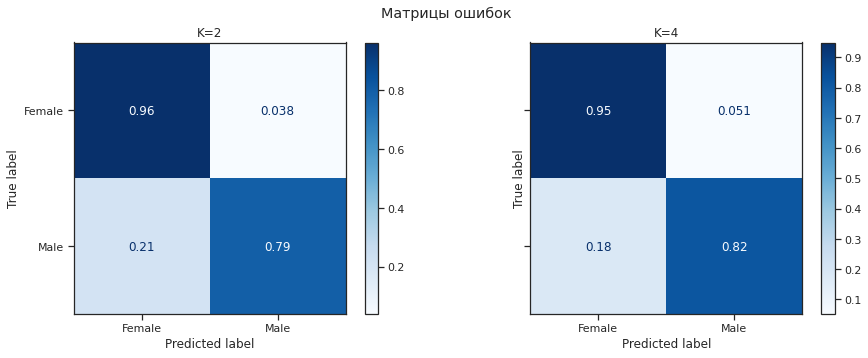

In [44]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
labels = ['Female', 'Male']

plot_confusion_matrix(KNeighborsClassifierObj, data_new_X_test[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_test, 
                      display_labels=labels, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(KNeighborsClassifierObj1, data_new_X_test[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_test, 
                      display_labels=labels, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=4')

In [45]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам (2 и 7 ближайших соседей соответственно)
precision_score(data_new_y_test, card1_1, average='micro'), precision_score(data_new_y_test, card2_1, average='micro')

(0.881578947368421, 0.8868421052631579)

In [46]:
# Для 2 ближайших соседей
precision_score(data_new_y_test, card1_1), recall_score(data_new_y_test, card1_1)

(0.9506578947368421, 0.7939560439560439)

In [47]:
# Для 4 ближайших соседей
precision_score(data_new_y_test, card2_1), recall_score(data_new_y_test, card2_1)

(0.9371069182389937, 0.8186813186813187)

In [48]:
# Отрисовка двух ROC-кривых
def draw_roc_curve_2(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    # стандартный метод из sklearn
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    # собственная реализация
    #fpr2, tpr2, thresholds2 = simple_roc_curve(y_true, y_score)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='green', alpha=0.5)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

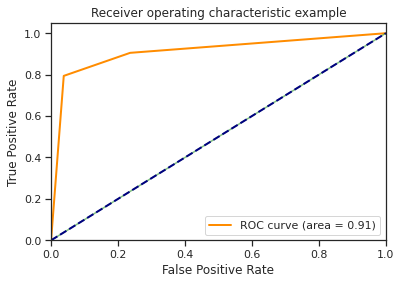

In [49]:
proba_card1_1 = KNeighborsClassifierObj.predict_proba(data_new_X_test[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']])
true_proba_card1_1 = proba_card1_1[:,1]
draw_roc_curve_2(np.array(data_new_y_test), np.array(true_proba_card1_1), pos_label=1, average='micro')

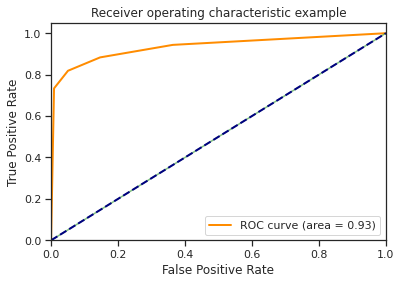

In [50]:
proba_card2_1 = KNeighborsClassifierObj1.predict_proba(data_new_X_test[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']])
true_proba_card2_1 = proba_card2_1[:,1]
draw_roc_curve_2(np.array(data_new_y_test), np.array(true_proba_card2_1), pos_label=1, average='micro')

In [51]:
#осуществим кросс-валидацию K-fold (2 соседа)
kf = KFold(n_splits=3)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train, scoring='f1_weighted', 
                         cv=kf)
scores

In [52]:
#осуществим кросс-валидацию K-fold (4 соседа)
kf = KFold(n_splits=3)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=4), 
                         data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train, scoring='f1_weighted', 
                         cv=kf)
scores

In [53]:
#а теперь Repeated K-Fold (2 соседа)
kf = RepeatedKFold(n_splits=4, n_repeats=2)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train, scoring='f1_weighted', 
                         cv=kf)
scores

In [54]:
#теперь Repeated K-Fold (4 соседа)
kf = RepeatedKFold(n_splits=4, n_repeats=2)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=4), 
                         data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train, scoring='f1_weighted', 
                         cv=kf)
scores

In [55]:
#Leave One Out (LOO)-d тестовую выборку помещается единственный элемент и 
#количество фолдов в этом случае определяется автоматически и равняется количеству элементов
#kf = LeaveOneOut()
#scores = cross_val_score(KNeighborsClassifier(), 
                         #data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train, 
                         #scoring='f1_weighted', cv=LeaveOneOut())
#scores
#scores = cross_val_score(KNeighborsClassifier(), X, y, cv=LeaveOneOut(), scoring='f1_weighted')
#print('{}\nMean: {}'.format(scores, np.mean(scores)))

In [56]:
scores = cross_val_score(KNeighborsClassifier(), data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train, 
                         cv=ShuffleSplit(n_splits=10, test_size=0.25, random_state=1), scoring='f1_weighted')
scores

In [57]:
n_range = np.array(range(1,32,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])}]

In [58]:
%%time
kf = KFold(n_splits=3)
#%%time
c_gs1 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
c_gs1.fit(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train)

CPU times: user 38.3 s, sys: 0 ns, total: 38.3 s
Wall time: 38.5 s


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])}],
             scoring='accuracy')

In [59]:
# Лучшая модель
c_gs1.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [60]:
# Лучшее значение метрики
c_gs1.best_score_

0.8787033809689788

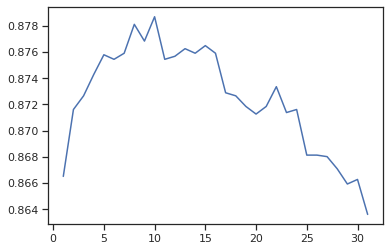

In [61]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, c_gs1.cv_results_['mean_test_score'])

In [62]:
%%time
kf = RepeatedKFold(n_splits=4, n_repeats=2)
#%%time
c_gs2 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
c_gs2.fit(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train)

CPU times: user 46.6 s, sys: 0 ns, total: 46.6 s
Wall time: 46.7 s


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=4, random_state=None),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])}],
             scoring='accuracy')

In [63]:
# Лучшая модель
c_gs2.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [64]:
# Лучшее значение метрики
c_gs2.best_score_

0.8806779590715134

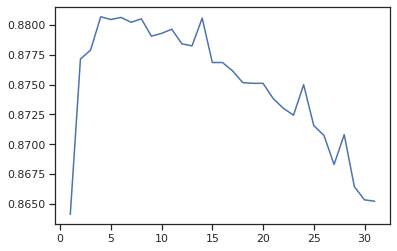

In [65]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, c_gs2.cv_results_['mean_test_score'])

In [66]:
%%time
kf = ShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
c_gs3 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
c_gs3.fit(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train)

CPU times: user 35.7 s, sys: 0 ns, total: 35.7 s
Wall time: 35.7 s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=1, test_size=0.25, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])}],
             scoring='accuracy')

In [67]:
# Лучшая модель
c_gs3.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [68]:
# Лучшее значение метрики
c_gs3.best_score_

0.8823420074349443

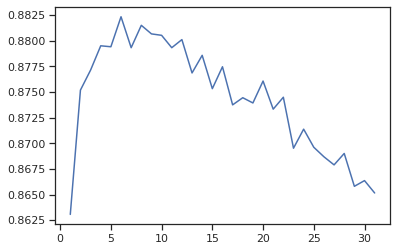

In [69]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, c_gs3.cv_results_['mean_test_score'])

In [70]:
%%time
kf = KFold(n_splits=3)
c_rs1 = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
c_rs1.fit(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train)

CPU times: user 4.6 s, sys: 0 ns, total: 4.6 s
Wall time: 4.6 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])}],
                   scoring='accuracy')

In [71]:
# Лучшая модель
c_rs1.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [72]:
# Лучшее значение метрики
c_rs1.best_score_

0.8781224584640409

In [84]:
%%time
kf = RepeatedKFold(n_splits=4, n_repeats=2)
c_rs2 = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
c_rs2.fit(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train)

CPU times: user 7.98 s, sys: 0 ns, total: 7.98 s
Wall time: 7.98 s


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=4, random_state=None),
                   estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])}],
                   scoring='accuracy')

In [85]:
# Лучшая модель
c_rs2.best_estimator_

KNeighborsClassifier(n_neighbors=14)

In [86]:
# Лучшее значение метрики
c_rs2.best_score_

0.8789941276124704

In [87]:
%%time
kf = ShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
c_rs3 = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
c_rs3.fit(data_new_X_train[['Customer_Age','Card_Category_new', 'Education_Level_new', 'Income_Category_new']], data_new_y_train)

CPU times: user 10 s, sys: 0 ns, total: 10 s
Wall time: 10 s


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=1, test_size=0.25, train_size=None),
                   estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])}],
                   scoring='accuracy')

In [88]:
# Лучшая модель
c_rs3.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [89]:
# Лучшее значение метрики
c_rs3.best_score_

0.8806691449814126

In [75]:
df_gs = pd.DataFrame(c_gs1.cv_results_)
df_rs = pd.DataFrame(c_rs1.cv_results_)
print(df_gs.shape, df_rs.shape)

(31, 12) (10, 12)
